# Sleep and Study Correlation

James Vuong  
Final Project  
CPSC 222, Fall 2021

### Introduction

My project domain is sleep. I chose the topic of my sleep data because I value sleep a lot, and like many other college students, I've noticed that my courseload and homework have had a direct impact on the amount of sleep I get each night. For the most part, on days that I have a lot of homework, I also noticed that the total hours of sleep for that night was lower than normal.

The dataset (SleepData.csv) involves multiple attributes. These are attributes, are:
* Date
* Day of Week 
* Time I Went to Bed (Minutes After Midnight) 
* Time I Woke Up (Minutes After Midnight)
* Total Time Slept (H)
* Heart Rate (BPM)
* REM Sleep (H)
* Average Outside Temperature (F)
* Did I Study a Lot? (T/F)

The Date, Day of Week, Time I Went to Bed, Time I Woke Up, and Did I Study a Lot were manually collected into the CSV File. Heart Rate and REM Sleep data was collected through an app that tracks that data, along with other types of data, on the fitness watch I wore. The average temperature outside was collected through the weather API's we used in DA4. 

In the dataset, I was trying to predict how much sleep I would get on a specific day of the week, whether or not there was a strong negative or postive correlation, and if there was a relationship between the sleep and if I studied a lot that same day.

The potential impacts of the results are, but not limited to, realizing what days of the week I'm likely to get more or less sleep, and possibly seeing if the outside temperature has an affect on the total amount of sleep I get per night. 

The stakeholders in this project who are interested in the results are myself, my friends, and anyone else who is interested in my sleeping patterns. 


### Data Analysis

In [186]:
from numpy.lib.function_base import average
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import utils

#loading the CSV file into a dataframe
sleep_data = pd.read_csv("Sleep Data.csv")
sleep_data_df = pd.DataFrame(sleep_data)


The data in my dataset has been cleaned. There are not any missing values as I was able to update the records every single day. In terms of merging the tables, I decided to manually merge the tables when I was making SleepData.csv file. 

For this particular instance, the biggest challenges was reminding myself to record the data for all the attributes before I forget them or so that the manual data entries doesn't pile up too much. 

#### Aggregation


In [187]:
#aggregating the data
day_data_df = sleep_data_df.groupby("Day")

#split, apply, combine aggregating method
#finding average amount of time slept in total
total_time_slept = pd.Series(dtype=float)
total_time_slept_series = round(sleep_data_df["Total Time Slept (H)"].mean(), 2)
print("Average Amount of Hours Per Day Slept from 9/13/2021 - 12/11/2021:", total_time_slept_series)

#finding total amount of sleep on weekends vs weekdays
weekend_sleep = []
weekday_sleep = []

#traversing through dataframe
for x in range(len(sleep_data)):
    if ("Friday" in sleep_data.at[x, "Day"] or "Saturday" in sleep_data.at[x, "Day"]):
        weekend_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
for x in range(len(sleep_data)):
    if ("Sunday" in sleep_data.at[x, "Day"] or "Monday" in sleep_data.at[x, "Day"] or "Tuesday" in sleep_data.at[x, "Day"] or "Wednesday" in sleep_data.at[x, "Day"] or "Thursday" in sleep_data.at[x, "Day"]):
        weekday_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
#turning lists into series
average_weekend = pd.Series(weekend_sleep)
average_weekday = pd.Series(weekday_sleep)

average_weekend_mean = round(average_weekend.mean(),2)
average_weekday_mean = round(average_weekday.mean(), 2)
print("Average Amount of Hours Slept on Weekdays:", average_weekday_mean)
print("Average Amount of Hours Slept on Weekends:", average_weekend_mean)

Average Amount of Hours Per Day Slept from 9/13/2021 - 12/11/2021: 6.69
Average Amount of Hours Slept on Weekdays: 6.52
Average Amount of Hours Slept on Weekends: 7.1


According to the aggregation methods, I slept more on the weekends compared to the weekends, which was expected, but only by a small margin. This could be due to the fact that I like to stay up late on the weekends and have fun.

#### Visualizations

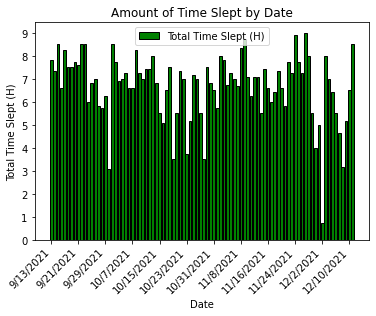

In [188]:
#bar chart showing the all of the dates in the dataset and the amount of sleep I got each day
dates_list = []
index_list = []
small_index = []
small_dates = []
total_sleep_data = []   
for x in range(len(sleep_data)):
    total_sleep_data.append(sleep_data.at[x, "Total Time Slept (H)"])
x = list(range(len(total_sleep_data)))
plt.figure()

for y in range(len(sleep_data)):
    dates_list.append(sleep_data.at[y, "Date"])
    index_list.append(y)
for y in range(0,len(dates_list), 8):
    small_index.append(index_list[y])
    small_dates.append(dates_list[y])
#plotting the graph
plt.bar(x, total_sleep_data, facecolor="green", edgecolor="black", label="Total Time Slept (H)")
plt.xticks(small_index,small_dates,rotation=45,ha="right")
plt.yticks(list(range(10)))
plt.xlabel("Date")
plt.ylabel("Total Time Slept (H)")
plt.title("Amount of Time Slept by Date")
plt.legend()
plt.show()

According to the bar chart above, the highest amount of sleep I got in the dataset in a single night was no higher than 9 hours, while the lowest amount of sleeep I got was a little under 1 hour. The minimum value of the dataset was due to lots of homework/coding projects that were due that day. 

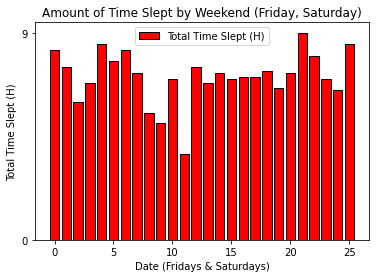

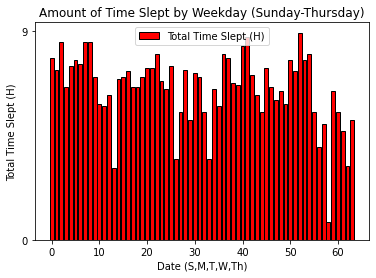

In [189]:
#bar chart showing the amount of sleep I get on the weekend versus weekdays
def weekend_graph(list_of_data, x_label, title, filename):

    weekend_sleep = []
    weekday_sleep = []
    weekend_sleep_dates = []
    weekday_sleep_dates = []
    #traversing through the dataframe and grabbing weekend values
    for x in range(len(sleep_data)):
        if ("Friday" in sleep_data.at[x, "Day"] or "Saturday" in sleep_data.at[x, "Day"]):
            weekend_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
            weekend_sleep_dates.append(sleep_data.at[x,"Date"])
    #traversing through the dataframe and grabbing weekday values
    for x in range(len(sleep_data)):
        if ("Sunday" in sleep_data.at[x, "Day"] or "Monday" in sleep_data.at[x, "Day"] or "Tuesday" in sleep_data.at[x, "Day"] or "Wednesday" in sleep_data.at[x, "Day"] or "Thursday" in sleep_data.at[x, "Day"]):
            weekday_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
            weekday_sleep_dates.append(sleep_data.at[x,"Date"])
    #plotting the graph
    x = list(range(len(list_of_data)))
    plt.figure()
    graph_label = "Total Time Slept (H)"
    plt.bar(x, list_of_data, facecolor="red", edgecolor="black", label=graph_label)
    #plt.xticks([weekend_sleep_dates])
    plt.yticks([0,9])
    plt.xlabel(x_label)
    plt.ylabel("Total Time Slept (H)")
    plt.title(title)
    plt.legend()
    plt.show()
    #plt.savefig(filename)
weekend_graph(weekend_sleep, "Date (Fridays & Saturdays)", "Amount of Time Slept by Weekend (Friday, Saturday)", "BAR CHART")
weekend_graph(weekday_sleep, "Date (S,M,T,W,Th)", "Amount of Time Slept by Weekday (Sunday-Thursday)", "BAR CHART")

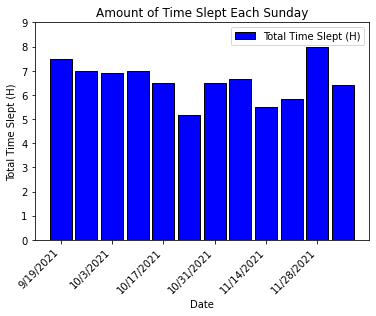

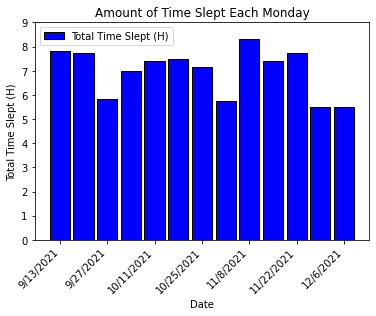

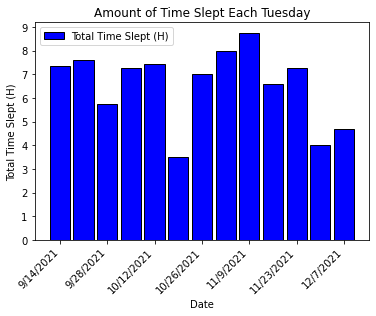

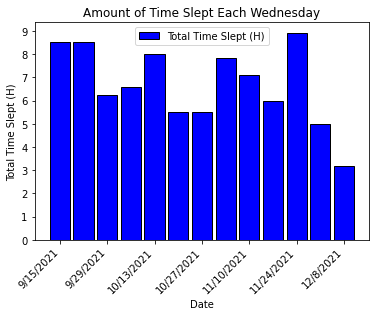

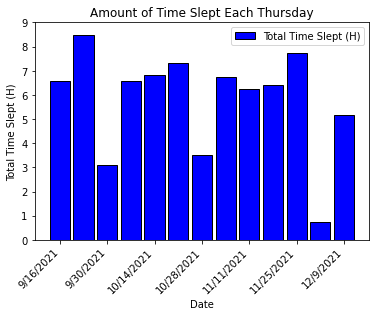

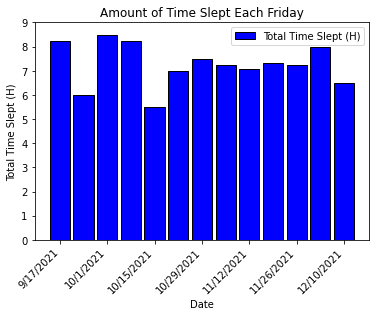

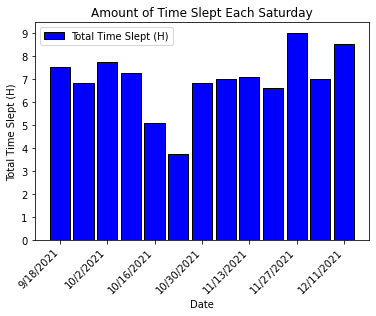

In [190]:
#bar charts showing the amount of sleep I get each day
def day_graph(day_of_week, graph_label, title):
    hours_slept_data = []
    day_of_week_dates = []
    index_list = []
    small_index = []
    small_day_of_week_dates = []
    #traversing through the dataframe and grabbing values
    for x in range(len(sleep_data)):
        if (day_of_week == sleep_data.at[x, "Day"]):
            hours_slept_data.append(sleep_data.at[x, "Total Time Slept (H)"])
            day_of_week_dates.append(sleep_data.at[x, "Date"])
            index_list.append(x)
    for x in range(0,len(day_of_week_dates),2):
        small_index.append(index_list[x])
        small_day_of_week_dates.append(day_of_week_dates[x])
    #plotting the graph
    y = list(range(len(hours_slept_data)))
    plt.figure()
    plt.bar(index_list, hours_slept_data, facecolor="blue", edgecolor="black", label=graph_label, width=6)
    plt.xticks(small_index, small_day_of_week_dates, rotation=45, ha="right")
    plt.yticks(list(range(10)))
    plt.xlabel("Date")
    plt.ylabel("Total Time Slept (H)")
    plt.title(title)
    plt.legend()
    plt.show()
    #plt.savefig(filename)
day_graph("Sunday", "Total Time Slept (H)", "Amount of Time Slept Each Sunday")
day_graph("Monday", "Total Time Slept (H)", "Amount of Time Slept Each Monday")
day_graph("Tuesday", "Total Time Slept (H)", "Amount of Time Slept Each Tuesday")
day_graph("Wednesday", "Total Time Slept (H)", "Amount of Time Slept Each Wednesday")
day_graph("Thursday", "Total Time Slept (H)", "Amount of Time Slept Each Thursday")
day_graph("Friday", "Total Time Slept (H)", "Amount of Time Slept Each Friday")
day_graph("Saturday", "Total Time Slept (H)", "Amount of Time Slept Each Saturday")

The bar charts above illustrate how much sleep I am getting on each day of the week since I started collecting data. As you can see, Thursday has the total lowest amount of sleep, while Sunday has the highest amount of total sleep.

#### Hypothesis Testing

Do I sleep more on the weekends or on the weekdays, on average?  
This would be a two sample, independent t-test.

**1. Identify a null and alternative hypothesis.**  
* $H_0$: The average amount of sleep on the weekends (Friday-Saturday) is greater than or equal to the average amount of sleep during the rest of the week (Sunday-Thursday) ($Sleep_{weekend} \ge Sleep_{rest}$). 
* $H_1$: The average amount of sleep on the weekends (Friday-Saturday) is less than the average amount of sleep during the rest of the week (Sunday-Thursday) ($Sleep_{weekend} < Sleep_{rest}$).

**2. Select the level of significance:**
* $\alpha$ = 0.005

**3. Select the appropriate test statistic.**
* $t = \frac{\overline{X_1}-\overline{X_2}}{\sqrt{S_p^2 (\frac{1}{n_1}+\frac{1}{n_2})}}$

* $S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1 + n_2 - 2}$

**4. Formulate the decision value.**  
* $\alpha$ = 0.005  
If t-computed is < t-critical(2.660), then we will reject $H_0$.  
If t-computed is $\ge$ t-critical(2.660), then we will accept $H_0$.

In [191]:
weekend_sleep = []
weekday_sleep = []
#traversing through the dataframe and grabbing weekend values
for x in range(len(sleep_data)):
    if ("Friday" == sleep_data.at[x, "Day"] or "Saturday" == sleep_data.at[x, "Day"]):
        weekend_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
#traversing through the dataframe and grabbing weekday values
for x in range(len(sleep_data)):
    if ("Sunday" == sleep_data.at[x, "Day"] or "Monday" == sleep_data.at[x, "Day"] or "Tuesday" == sleep_data.at[x, "Day"] or "Wednesday" == sleep_data.at[x, "Day"] or "Thursday" == sleep_data.at[x, "Day"]):
        weekday_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])

# print(weekday_sleep)
# print(weekend_sleep)

weekend_sleep_series = pd.Series(weekend_sleep)
weekday_sleep_series = pd.Series(weekday_sleep)

weekday_sleep_mean = round(weekday_sleep_series.mean(), 2)
weekend_sleep_mean = round(weekend_sleep_series.mean(), 2)

print("Weekday Average:", weekday_sleep_mean)
print("Weekend Average:", weekend_sleep_mean)
#applying t-test
t, p = stats.ttest_ind(weekend_sleep_series, weekday_sleep_series)
print("T:", t, "P:", p)

Weekday Average: 6.52
Weekend Average: 7.1
T: 1.7468665078293797 P: 0.08414947629854032


**5. Make a decision**
* **Conclusion:** Since t-computed(.475) was less than the t-critical (2.660), then we must reject $H_0$. This means that the alternative hypothesis is correct and that the average amount of sleep that I get on the weekends is greater than the amount of sleep I get on the weekday. 

Do I get more sleep on Sundays or Thursdays?  
This will be an independent two sample t-test.

**1. Identify a null and alternative hypothesis.**  
* $H_0$: The average amount of sleep on the Sunday is greater than or equal to the average amount of sleep on Thursdays ($Sleep_{Sudnday} \ge Sleep_{Thursday}$). 
* $H_1$: The average amount of sleep on the Sunday is greater than or equal to the average amount of sleep on Thursdays ($Sleep_{Sudnday} < Sleep_{Thursday}$). 

**2. Select the level of significance:**
* $\alpha$ = 0.005

**3. Select the appropriate test statistic.**
* $t = \frac{\overline{X_1}-\overline{X_2}}{\sqrt{S_p^2 (\frac{1}{n_1}+\frac{1}{n_2})}}$

* $S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1 + n_2 - 2}$

**4. Formulate the decision value.**  
* $\alpha$ = 0.005  
If t-computed is < t-critical(2.660), then we will accept $H_0$.  
If t-computed is $\ge$ t-critical(2.660), then we will reject $H_0$.

In [192]:
thursday_sleep = []
sunday_sleep = []
#traversing through the dataframe and grabbing Thursday values
for x in range(len(sleep_data)):
    if ("Thursday" == sleep_data.at[x, "Day"]):
        thursday_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
#traversing through the dataframe and grabbing Sunday values
for x in range(len(sleep_data)):
    if ("Sunday" == sleep_data.at[x, "Day"]):
        sunday_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])

thursday_sleep_series = pd.Series(thursday_sleep)
sunday_sleep_series = pd.Series(sunday_sleep)
#applying t-test
t, p = stats.ttest_ind(sunday_sleep_series, thursday_sleep_series)
print("T:", t, "P:", p)

T: 1.1731530507056138 P: 0.2527412005534525


**5. Make a decision**
* **Conclusion:** Since t-computed(1.17) was less than the t-critical (2.660), then we must accept $H_0$. This means that the null hypothesis was correct and that the average amount of sleep I got on Sundays was higher than the average amount of slept I got on Thursdays.

### Classification

I will be using the Total Time Slept (H) and Day attributes to predict whether or not I studied a lot that night. 

My hypothesis is that on days closer to the end of the week (Wednesday, Thursday specifically) the prediction will be that I did study a lot. As for the other days, it's a toss up. 

The challenges with classification were conceptually understandin the kNN classifier and all the libraries that come with it. Additionally, just doing the entire classification and prediction as a whole was pretty difficult for me. 




### Conclusion

The dataset I used for the kNN model was a combination of both string values and numerical values that I had to normalize. The outcome of this prediction given the 3 nearest neighbors was that I do study a lot on days like Thursday and Wednesday. For the linear regression data, I was able to see the correlation between the amount of sleep I get and the day of the week. There correlation was pretty strong as I had predicted, but I think there was a stronger correlation between the the day of the week and if I had studied a lot that day. 

The potential impacts of my work for the stakeholders are pretty much that it demonstrates how much little sleep I'm getting on a nightly basis and that I definitely should be getting more sleep. If this was a health study for the amount of sleep an average college CS student gets, then this would be pretty important. However, this isn't the case, so this information doesn't hold much power to it.

Sources: classroom notes
